In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykat import finesse    
from pykat.commands import *  
step=0.0004000000189989805 #spacing in meters

%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [3]:
aLIGO=pd.read_csv('ETM08_S1_-power160_finesse.txt', sep=" ", skiprows=9)
del aLIGO['Unnamed: 777']
overlap=[]
for n in range(7):
    for m in range(-n,n+1,2):
        znm=pd.read_csv('Z{}{}order1phasemap_finesse.txt'.format(n,m), sep=" ", skiprows=9)
        del znm['Unnamed: 777']
        if m==0:
            epsilon=2
        else:
            epsilon=1
        overlap.append((aLIGO.values*znm.values*step**2).sum()*(2*n+2)/epsilon/np.pi)
        #see the pdf file for explanation

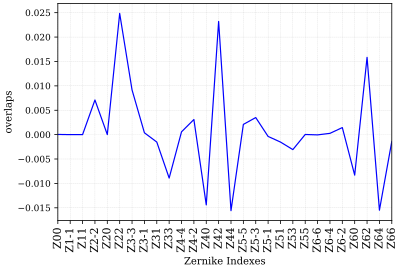

In [4]:
xticks=['Z00','Z1-1','Z11','Z2-2','Z20','Z22','Z3-3','Z3-1','Z31','Z33','Z4-4','Z4-2','Z40','Z42','Z44','Z5-5','Z5-3','Z5-1','Z51','Z53','Z55','Z6-6','Z6-4','Z6-2','Z60','Z62','Z64','Z66']
plt.plot(overlap)
plt.xticks(range(28), xticks, rotation='vertical', fontsize=11)
plt.xlabel('Zernike Indexes')
plt.ylabel('overlaps')
plt.show()